#### **Métodos Numéricos II, 2025** <font size=4 color='gray'>Alan Reyes-Figueroa</font>
# <center> **PCA para compresión de imágenes (básico)** </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
#from PIL import Image

## 1. PCA con imágenes

In [2]:
I = plt.imread('quetzal.png')
I = I[:,:,:3]
I.shape

(540, 500, 3)

In [3]:
Igray = rgb2gray(I)
Igray.shape

(540, 500)

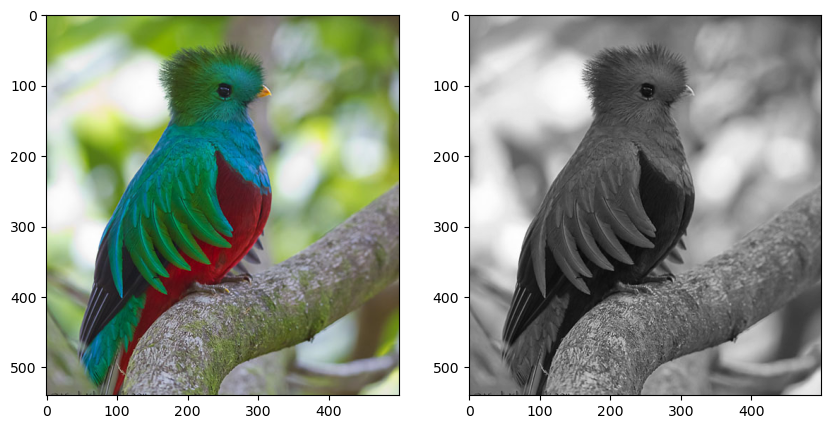

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(Igray, cmap=plt.cm.gray)
plt.show()

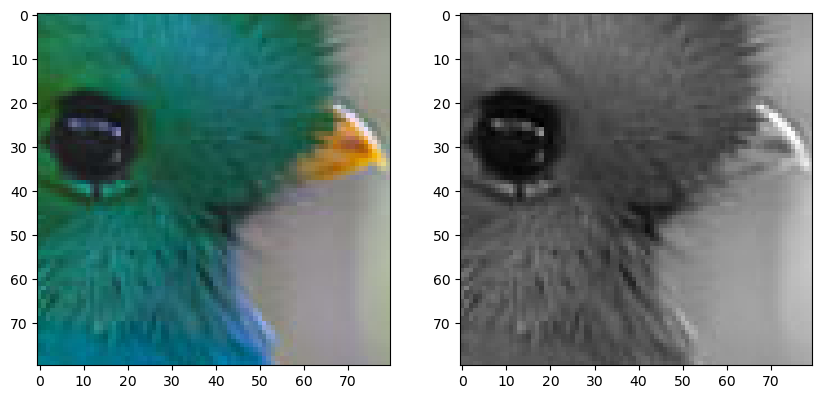

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(I[80:160, 240:320, :])
plt.subplot(1,2,2)
plt.imshow(Igray[80:160, 240:320], cmap=plt.cm.gray)
plt.show()

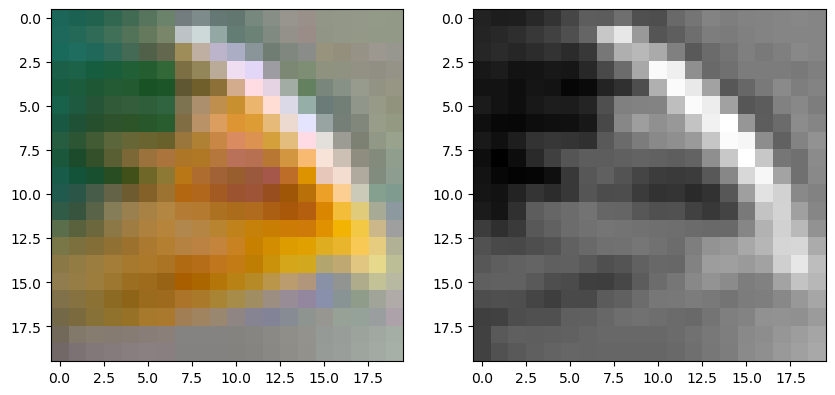

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(I[100:120, 300:320, :])
plt.subplot(1,2,2)
plt.imshow(Igray[100:120, 300:320], cmap=plt.cm.gray)
plt.show()

In [7]:
print((255*Igray[80:98, 300:318]).astype(np.uint8))

[[ 68  73  84  98 110 118 123 139 139 138 135 134 136 142 147 145 145 145]
 [ 75  83  89  98 107 111 111 116 122 130 135 136 138 139 141 146 146 146]
 [ 89  94  92  92  99 107 108 108 117 129 138 141 143 144 144 148 147 147]
 [ 93  92  85  82  91 105 114 127 131 135 137 137 136 138 140 149 149 148]
 [ 79  79  77  81  94 111 122 117 121 126 130 134 138 144 149 150 150 149]
 [ 80  79  81  87  96 108 116 130 135 141 145 145 144 146 147 151 150 150]
 [ 86  85  82  81  94 118 136 147 140 133 132 136 141 143 142 150 151 153]
 [ 75  78  86  97 106 110 111 102 108 117 126 135 141 144 146 151 153 154]
 [ 83  81  81  80  81  82  83 101 114 130 141 144 146 150 154 153 154 156]
 [ 87  84  76  71  75  88 101 126 135 144 148 145 144 148 153 155 156 158]
 [ 84  83  86  92 105 118 125 132 135 138 141 141 143 149 152 156 158 159]
 [ 84  85  88  96 104 111 114 117 121 127 134 143 150 154 156 157 158 159]
 [ 86  86  83  81  85  93 100 105 110 120 132 142 149 152 153 157 158 159]
 [ 95  93  88  83  83  89

In [8]:
stack = Igray.copy()

In [9]:
# Centramos los datos
mu = stack.mean(axis=0)
std = stack.std(axis=0)

Xc = (stack - mu) / std

In [10]:
U, S, V = np.linalg.svd(Xc)
print(U.shape, S.shape, V.shape)

(540, 540) (500,) (500, 500)


In [11]:
S = np.diag(S)
S.shape

(500, 500)

In [12]:
# probando con los siguientes números de componentes principales
ks = [1,2,3,4,5,10,15,20,30,40,50,60,70,80,90,100]

Ishape = Igray.shape[:2]
approx = []

for k in ks:
    J = U[:,:k] @ S[:k,:k] @ V[:k,:] 
    approx.append(J)

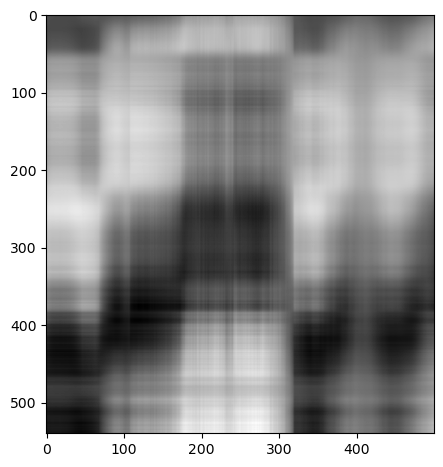

In [13]:
plt.figure(figsize=(5,5.5))
plt.imshow(approx[1], cmap='gray')
plt.show()

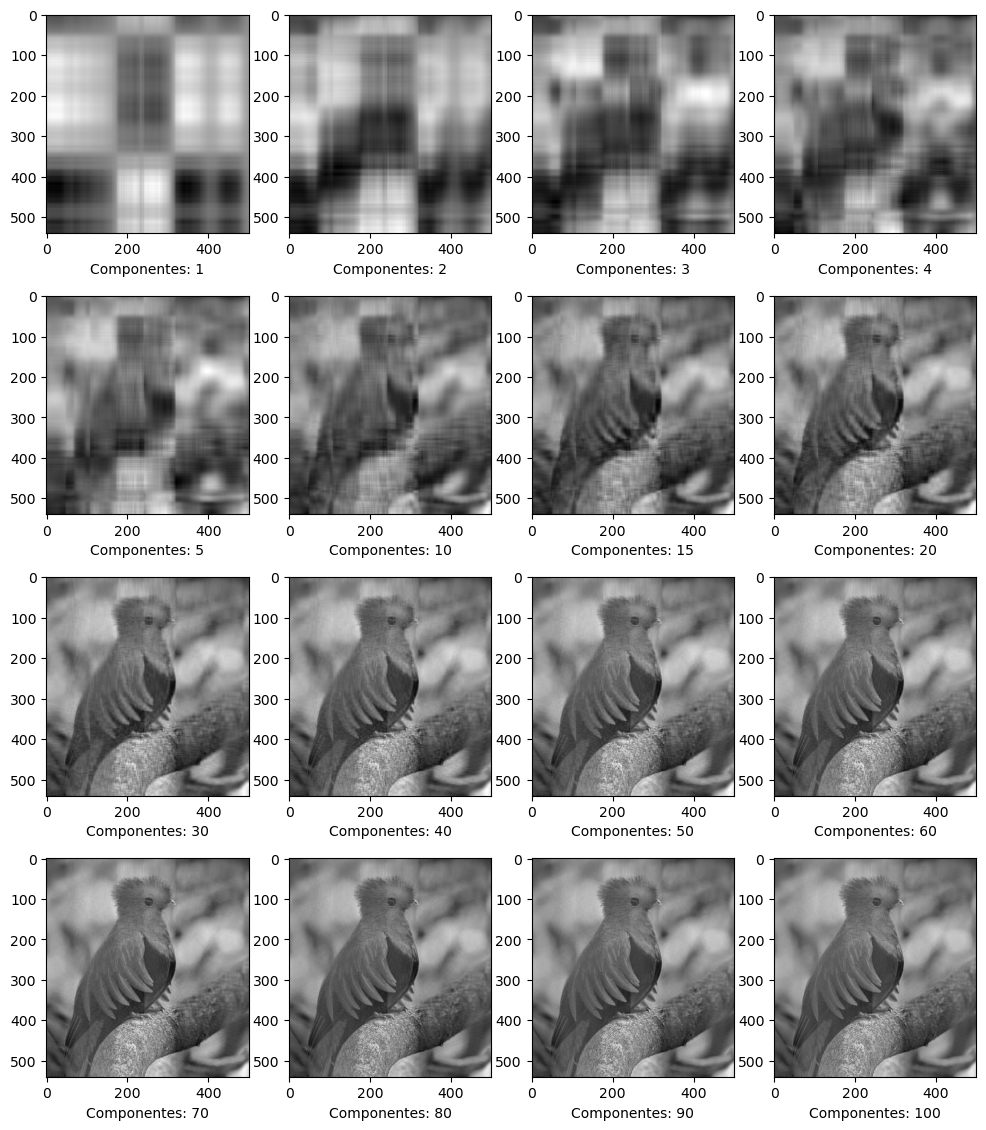

In [14]:
plt.figure(figsize=(12,14))
for i in range(0, 4):
    for j in range(0, 4):
        plt.subplot(4,4,4*i+j+1)
        plt.imshow(approx[4*i+j], cmap='gray')
        plt.xlabel('Componentes: {}'.format(ks[4*i+j]))
plt.show()

### Cálculo del Error

In [15]:
Cov = (Xc.T) @ Xc

In [16]:
eigs, _ = np.linalg.eig(Cov)

In [17]:
explained_variance = eigs / eigs.sum()

In [18]:
np.round(explained_variance[:40], 4)

array([0.3608, 0.1818, 0.1271, 0.0645, 0.0424, 0.0311, 0.0261, 0.0218,
       0.0151, 0.0099, 0.0091, 0.0074, 0.0066, 0.0056, 0.0053, 0.005 ,
       0.0043, 0.004 , 0.0035, 0.0032, 0.0029, 0.0028, 0.0026, 0.0023,
       0.0018, 0.0017, 0.0017, 0.0016, 0.0016, 0.0014, 0.0013, 0.0014,
       0.0012, 0.0012, 0.0011, 0.0011, 0.001 , 0.001 , 0.001 , 0.0009],
      dtype=float32)

In [19]:
explained_variance[:30].sum()

0.95492226

In [20]:
explained_accumulative = explained_variance.cumsum()
explained_accumulative[:50]

array([0.3608129 , 0.5425668 , 0.66967076, 0.7341574 , 0.77651024,
       0.80760497, 0.83368933, 0.85545677, 0.8705813 , 0.8804876 ,
       0.8895566 , 0.8969213 , 0.90352696, 0.9091104 , 0.9144079 ,
       0.91945606, 0.9237576 , 0.9277903 , 0.9312792 , 0.93444777,
       0.9373936 , 0.9401926 , 0.94281036, 0.94513285, 0.9469413 ,
       0.94867206, 0.95033264, 0.95194584, 0.95350987, 0.95492214,
       0.956271  , 0.95762753, 0.95887184, 0.9600636 , 0.96119505,
       0.96228856, 0.96332765, 0.96433324, 0.96528655, 0.9662243 ,
       0.96712464, 0.968009  , 0.9688612 , 0.96967685, 0.9704851 ,
       0.9712847 , 0.972048  , 0.9727896 , 0.9735184 , 0.97421205],
      dtype=float32)

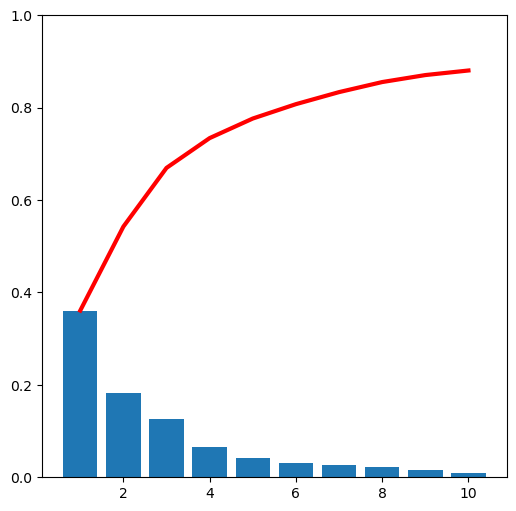

In [21]:
k = 10
plt.figure(figsize=(6,6))
plt.bar(np.arange(1,1+k), explained_variance[:k])
plt.plot(np.arange(1,1+k), explained_accumulative[:k], 'r-', lw=3)
plt.ylim([0,1])
plt.show()

In [22]:
print(explained_accumulative[:10])

[0.3608129  0.5425668  0.66967076 0.7341574  0.77651024 0.80760497
 0.83368933 0.85545677 0.8705813  0.8804876 ]


In [23]:
error = 1 - explained_accumulative

In [24]:
print(error[:10])

[0.6391871  0.45743322 0.33032924 0.26584262 0.22348976 0.19239503
 0.16631067 0.14454323 0.12941867 0.11951238]


In [25]:
r = 40     # number of components
print('% Compression Error = {}'.format(1 - explained_accumulative[r-1]))
print('% Explained Variability = {}'.format(explained_accumulative[r-1]))

% Compression Error = 0.0337756872177124
% Explained Variability = 0.9662243127822876


# Cálculo de la eficiencia de Compresión

In [26]:
h, w = Xc.shape[:2]
print(h, w)

540 500


In [27]:
original_size   = (h*w) / 1024.

r = 40  # number of components
compressed_size = ((h*r) + r + (r*w)) * 4 / 1024.

In [28]:
print('Original   size = {} Kb'.format(original_size))
print('Compressed size = {} Kb'.format(compressed_size))
print('Reduction ratio = {}'.format(1 - compressed_size/original_size))

Original   size = 263.671875 Kb
Compressed size = 162.65625 Kb
Reduction ratio = 0.38311111111111107
